# Dunham's Data

## Setting up

In [51]:
import math

import pandas as pd
import seaborn as sns

In [52]:
# pd.set_option('display.max_rows', 999)

In [53]:
# sns.set()

In [54]:
# %matplotlib inline

## Loading data

In [55]:
itinerary_df = pd.read_csv('data/out/itinerary_1955-92.csv')
itinerary_df.fillna('', inplace=True)

In [56]:
itinerary_df.shape

(22, 10)

In [57]:
itinerary_df

,START_DATE,END_DATE,CITY,COUNTRY,N_ROWS,LAST_MOMENT,MIN_NIGHTS,MAX_NIGHTS,LATITUDE,LONGITUDE
0,9/1/1975,9/1/1975,Edinburgh,Scotland,1,Probably that night,0,1,55.953346,-3.188375
1,9/7/1975,9/7/1975,Glasgow,Scotland,1,Probably that night,0,1,55.861155,-4.250169
2,9/16/1975,9/16/1975,Madrid,Spain,1,Probably that night,0,1,40.416705,-3.703582
3,9/22/1975,9/22/1975,Amsterdam,Holland,1,Probably that night,0,1,52.373080,4.892453
4,10/17/1975,10/17/1975,Vienna,Austria,1,Probably that night,0,1,48.208354,16.372504
5,10/20/1975,10/20/1975,Zurich,Switzerland,1,Probably that night,0,1,47.374449,8.541042
6,10/21/1975,10/21/1975,Lugano,Switzerland,1,Probably that night,0,1,46.005010,8.952028
7,10/23/1975,10/23/1975,Lausanne,Switzerland,1,Probably that night,0,1,46.521827,6.632702
8,10/24/1975,10/24/1975,Basel,Switzerland,1,Probably that night,0,1,47.558108,7.587826
9,10/25/1975,10/25/1975,Bregenz,Austria,1,Probably that night,0,1,47.502578,9.747292


## Pre-processing data

In [58]:
itinerary_df = itinerary_df[pd.to_datetime(itinerary_df.START_DATE) < '1993'].copy()
itinerary_df.tail()

,START_DATE,END_DATE,CITY,COUNTRY,N_ROWS,LAST_MOMENT,MIN_NIGHTS,MAX_NIGHTS,LATITUDE,LONGITUDE
17,12/4/1975,12/4/1975,London,United Kingdom,1,Probably that night,0,1,51.507446,-0.127765
18,12/8/1975,12/8/1975,New York,New York,1,Probably that night,0,1,40.712728,-74.006015
19,12/31/1975,12/31/1975,London,United Kingdom,1,Probably that night,0,1,51.507446,-0.127765
20,1/12/1976,1/12/1976,Paris,France,1,Probably that night,0,1,48.858890,2.320041
21,2/15/1976,2/15/1976,Los Angeles,California,1,Probably that night,0,1,34.053691,-118.242766


In [59]:
first_date = pd.to_datetime(itinerary_df.START_DATE.iloc[0].split('-')[0])
last_date = pd.to_datetime(itinerary_df.END_DATE.iloc[-1])
total_days = (last_date - first_date).days + 1

In [60]:
total_days

168

In [61]:
itinerary_df['GROUP'] = 0
group = 1
itinerary_df.loc[0, 'GROUP'] = group
for i, row in itinerary_df[1:].iterrows():
    prev_row = itinerary_df.loc[i-1]
    prev_row_end_date = pd.to_datetime(prev_row['END_DATE'])
    curr_row_start_date = pd.to_datetime(row['START_DATE'])
    n_days = (curr_row_start_date - prev_row_end_date).days
    if n_days == 0:
        print('ERROR')
    elif n_days <= 7:
        pass
    else: # n_days > 7
        group += 1
    itinerary_df.loc[i, 'GROUP'] = group

In [62]:
itinerary_df.head()

,START_DATE,END_DATE,CITY,COUNTRY,N_ROWS,LAST_MOMENT,MIN_NIGHTS,MAX_NIGHTS,LATITUDE,LONGITUDE,GROUP
0,9/1/1975,9/1/1975,Edinburgh,Scotland,1,Probably that night,0,1,55.953346,-3.188375,1
1,9/7/1975,9/7/1975,Glasgow,Scotland,1,Probably that night,0,1,55.861155,-4.250169,1
2,9/16/1975,9/16/1975,Madrid,Spain,1,Probably that night,0,1,40.416705,-3.703582,2
3,9/22/1975,9/22/1975,Amsterdam,Holland,1,Probably that night,0,1,52.373080,4.892453,2
4,10/17/1975,10/17/1975,Vienna,Austria,1,Probably that night,0,1,48.208354,16.372504,3


In [63]:
itinerary_df.tail()

,START_DATE,END_DATE,CITY,COUNTRY,N_ROWS,LAST_MOMENT,MIN_NIGHTS,MAX_NIGHTS,LATITUDE,LONGITUDE,GROUP
17,12/4/1975,12/4/1975,London,United Kingdom,1,Probably that night,0,1,51.507446,-0.127765,5
18,12/8/1975,12/8/1975,New York,New York,1,Probably that night,0,1,40.712728,-74.006015,5
19,12/31/1975,12/31/1975,London,United Kingdom,1,Probably that night,0,1,51.507446,-0.127765,6
20,1/12/1976,1/12/1976,Paris,France,1,Probably that night,0,1,48.858890,2.320041,7
21,2/15/1976,2/15/1976,Los Angeles,California,1,Probably that night,0,1,34.053691,-118.242766,8


In [64]:
aux_df = itinerary_df.drop_duplicates('CITY', keep='last') \
    [['CITY', 'LATITUDE', 'LONGITUDE', 'GROUP', 'END_DATE']]

In [65]:
aux_df.head()

,CITY,LATITUDE,LONGITUDE,GROUP,END_DATE
0,Edinburgh,55.953346,-3.188375,1,9/1/1975
1,Glasgow,55.861155,-4.250169,1,9/7/1975
2,Madrid,40.416705,-3.703582,2,9/16/1975
3,Amsterdam,52.373080,4.892453,2,9/22/1975
4,Vienna,48.208354,16.372504,3,10/17/1975


## Processing data

In [66]:
def next_year(d_str):
    return pd.to_datetime('{}-01-01'.format(int(d_str.split('-')[0]) + 1))

def altitud_year(d):
    return (d - first_date).days# + 1

In [67]:
points_df = aux_df[['LATITUDE', 'LONGITUDE', 'CITY']].copy()
# points_df['ALTITUDE'] = aux_df['END_DATE'].apply(lambda x: altitud_year(next_year(x)))
points_df['ALTITUDE'] = aux_df['END_DATE'].apply(lambda x: altitud_year(pd.to_datetime(x)))

In [68]:
points_df.shape

(19, 4)

In [69]:
points_df.head()

,LATITUDE,LONGITUDE,CITY,ALTITUDE
0,55.953346,-3.188375,Edinburgh,0
1,55.861155,-4.250169,Glasgow,6
2,40.416705,-3.703582,Madrid,15
3,52.373080,4.892453,Amsterdam,21
4,48.208354,16.372504,Vienna,46


In [70]:
cities_df = aux_df[['CITY', 'LATITUDE', 'LONGITUDE']].copy()
cities_df.columns = ['TEXT', 'LATITUDE', 'LONGITUDE']
cities_df['ALTITUDE'] = 0
cities_df['TYPE'] = 'city'

In [71]:
cities_df.shape

(19, 5)

In [72]:
cities_df.head()

,TEXT,LATITUDE,LONGITUDE,ALTITUDE,TYPE
0,Edinburgh,55.953346,-3.188375,0,city
1,Glasgow,55.861155,-4.250169,0,city
2,Madrid,40.416705,-3.703582,0,city
3,Amsterdam,52.373080,4.892453,0,city
4,Vienna,48.208354,16.372504,0,city


In [73]:
years_df = pd.DataFrame(columns=['TEXT', 'LATITUDE', 'LONGITUDE', 'ALTITUDE', 'TYPE'])
for i, row in aux_df.iterrows():
    end_date = aux_df.loc[i, 'END_DATE']
    next_year_date = next_year(end_date)
#     print(aux_df.loc[i, 'CITY'], end_date)
#     print(pd.date_range(first_date, next_year_date, freq='YS'))
    for d in pd.date_range(first_date, next_year_date, freq='YS'):
        years_df.loc[len(years_df)] = [str(d.year), row['LATITUDE'], row['LONGITUDE'], altitud_year(d), 'year']

ValueError: invalid literal for int() with base 10: '9/1/1975'

In [74]:
years_df.shape

(0, 5)

In [75]:
years_df.head(10)

,TEXT,LATITUDE,LONGITUDE,ALTITUDE,TYPE


In [76]:
labels_df = pd.concat([cities_df, years_df], ignore_index=True)

In [77]:
labels_df.shape

(19, 5)

In [78]:
def format_date(date_str):
    return pd.to_datetime(date_str).strftime('%b %d, %Y').replace(' 0', ' ')

paths_df = pd.DataFrame(columns=['LATITUDE', 'LONGITUDE', 'ALTITUDE', 'GROUP', 'CITY', 'DATE'])
for i, row in itinerary_df.iterrows():
    paths_df.loc[i*2, 'LATITUDE'] = row['LATITUDE']
    paths_df.loc[i*2, 'LONGITUDE'] = row['LONGITUDE']
    paths_df.loc[i*2, 'ALTITUDE'] =  (pd.to_datetime(row['START_DATE']) - first_date).days
    paths_df.loc[i*2, 'GROUP'] = row['GROUP']
    paths_df.loc[i*2, 'CITY'] = row['CITY']
    paths_df.loc[i*2, 'DATE'] = format_date(row['START_DATE'])
    paths_df.loc[i*2+1, 'LATITUDE'] = paths_df.loc[i*2, 'LATITUDE']
    paths_df.loc[i*2+1, 'LONGITUDE'] = paths_df.loc[i*2, 'LONGITUDE']
    paths_df.loc[i*2+1, 'ALTITUDE'] =  (pd.to_datetime(row['END_DATE']) - first_date).days
#     paths_df.loc[i*2+1, 'ALTITUDE'] =  paths_df.loc[i*2, 'ALTITUDE'] + row['MAX_NIGHTS']
    paths_df.loc[i*2+1, 'GROUP'] = paths_df.loc[i*2, 'GROUP']
    paths_df.loc[i*2+1, 'CITY'] = paths_df.loc[i*2, 'CITY']
    paths_df.loc[i*2+1, 'DATE'] = format_date(row['END_DATE'])
# paths_df['COLOR'] = paths_df['GROUP'].apply(rgb01Hex)

In [79]:
paths_df.shape

(44, 6)

In [80]:
paths_df.head()

,LATITUDE,LONGITUDE,ALTITUDE,GROUP,CITY,DATE
0,55.953346,-3.188375,0,1,Edinburgh,"Sep 1, 1975"
1,55.953346,-3.188375,0,1,Edinburgh,"Sep 1, 1975"
2,55.861155,-4.250169,6,1,Glasgow,"Sep 7, 1975"
3,55.861155,-4.250169,6,1,Glasgow,"Sep 7, 1975"
4,40.416705,-3.703582,15,2,Madrid,"Sep 16, 1975"


In [81]:
paths_df.tail()

,LATITUDE,LONGITUDE,ALTITUDE,GROUP,CITY,DATE
39,51.507446,-0.127765,121,6,London,"Dec 31, 1975"
40,48.85889,2.320041,133,7,Paris,"Jan 12, 1976"
41,48.85889,2.320041,133,7,Paris,"Jan 12, 1976"
42,34.053691,-118.242766,167,8,Los Angeles,"Feb 15, 1976"
43,34.053691,-118.242766,167,8,Los Angeles,"Feb 15, 1976"


In [82]:
total_lines = len(paths_df) - 1

In [83]:
total_lines

43

In [84]:
N = 300

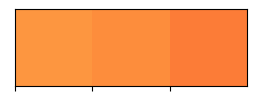

In [85]:
# Color 1
palette1 = sns.color_palette('YlOrRd', n_colors=total_lines+N*2)[N:-N]
# sns.palplot(palette1)
sns.palplot([palette1[0], palette1[len(palette1)//2], palette1[-1]])

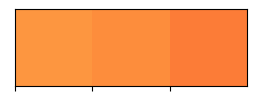

In [86]:
# Color 1R
palette1r = sns.color_palette('YlOrRd', n_colors=total_lines+N*2)[-N:N:-1]
# sns.palplot(palette1)
sns.palplot([palette1[0], palette1[len(palette1)//2], palette1[-1]])

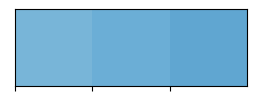

In [87]:
# Color 2
palette2 = sns.color_palette('Blues', n_colors=total_lines+N*2)[N:-N]
# sns.palplot(palette2)
sns.palplot([palette2[0], palette2[len(palette2)//2], palette2[-1]])

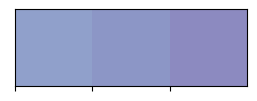

In [88]:
# Color 3
palette3 = sns.color_palette('BuPu', n_colors=total_lines+N*2)[N:-N]
# sns.palplot(palette3)
sns.palplot([palette3[0], palette3[len(palette3)//2], palette3[-1]])

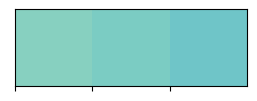

In [89]:
# Color 4
palette4 = sns.color_palette('GnBu', n_colors=total_lines+N*2)[N:-N]
# sns.palplot(palette4)
sns.palplot([palette4[0], palette4[len(palette4)//2], palette4[-1]])

In [90]:
def rgb01Hex(n, palette):
    c = palette[n]
    r = int(round(c[0] * 255))
    g = int(round(c[1] * 255))
    b = int(round(c[2] * 255))
    h = '#%02x%02x%02x' % (r, g, b)
    return h

In [91]:
path_colors_df = pd.DataFrame(columns=[
    'CITY1', 'CITY2', 'HEXCODE1', 'HEXCODE1R', 'HEXCODE2', 'HEXCODE3', 'HEXCODE4',
])
prev_g = paths_df.GROUP[0]
for curr_g in paths_df.GROUP[1:]:
    i = len(path_colors_df)
    if curr_g == prev_g:
        path_colors_df.loc[i] = [
            paths_df.loc[i, 'CITY'],
            paths_df.loc[i+1, 'CITY'],
            rgb01Hex(i, palette1),
            rgb01Hex(i, palette1r),
            rgb01Hex(i, palette2),
            rgb01Hex(i, palette3),
            rgb01Hex(i, palette4),
        ]
    else:
        path_colors_df.loc[i] = [
            paths_df.loc[i, 'CITY'],
            paths_df.loc[i+1, 'CITY'],
            'grey', 'grey', 'grey', 'grey', 'grey',
        ]
    prev_g = curr_g

In [92]:
path_colors_df.shape

(43, 7)

In [93]:
path_colors_df.head()

,CITY1,CITY2,HEXCODE1,HEXCODE1R,HEXCODE2,HEXCODE3,HEXCODE4
0,Edinburgh,Edinburgh,#fd9740,#fd7c37,#79b5d9,#91a0cb,#87d1c0
1,Edinburgh,Glasgow,#fd9640,#fd7c37,#77b5d9,#909fcb,#86d0c0
2,Glasgow,Glasgow,#fd9640,#fd7e38,#77b5d9,#909fcb,#86d0c0
3,Glasgow,Madrid,grey,grey,grey,grey,grey
4,Madrid,Madrid,#fd953f,#fd7e38,#75b4d8,#909eca,#84cfc1


In [94]:
path_colors_df.tail()

,CITY1,CITY2,HEXCODE1,HEXCODE1R,HEXCODE2,HEXCODE3,HEXCODE4
38,London,London,#fd8038,#fd953f,#63a8d3,#8c8dc2,#72c7c7
39,London,Paris,grey,grey,grey,grey,grey
40,Paris,Paris,#fd7e38,#fd9640,#61a7d2,#8c8cc1,#70c6c8
41,Paris,Los Angeles,grey,grey,grey,grey,grey
42,Los Angeles,Los Angeles,#fd7c37,#fd9640,#60a7d2,#8c8bc0,#6fc5c8


In [95]:
# sns.palplot(path_colors_df.HEXCODE1)

In [96]:
# sns.palplot(path_colors_df.HEXCODE1R)

In [97]:
# sns.palplot(path_colors_df.HEXCODE2)

In [98]:
# sns.palplot(path_colors_df.HEXCODE3)

In [99]:
# sns.palplot(path_colors_df.HEXCODE4)

## Saving data

In [100]:
points_df.to_csv('web/data/points4760.csv', index=False)
labels_df.to_csv('web/data/labels4760.csv', index=False)
paths_df.to_csv('web/data/paths4760.csv', index=False)
path_colors_df.to_csv('web/data/path_colors4760.csv', index=False)